# Neurons and Layers

In this lab we will explore the inner workings of neurons/units and layers. In particular, the lab will draw parallels to the models you have mastered in Course 1, the regression/linear model and the logistic model. The lab will introduce Tensorflow and demonstrate how these models are implemented in that framework.

# Packages

Tensorflow and Keras
Tensorflow is a machine learning package developed by Google. In 2019, Google integrated Keras into Tensorflow and released Tensorflow 2.0. Keras is a framework developed independently by François Chollet that creates a simple, layer-centric interface to Tensorflow. This course will be using the Keras interface.

In [1]:
!pip install matplotlib
!pip install tensorflow

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras import Sequential
from tensorflow.keras.losses import MeanSquaredError, BinaryCrossentropy
from tensorflow.keras.activations import sigmoid

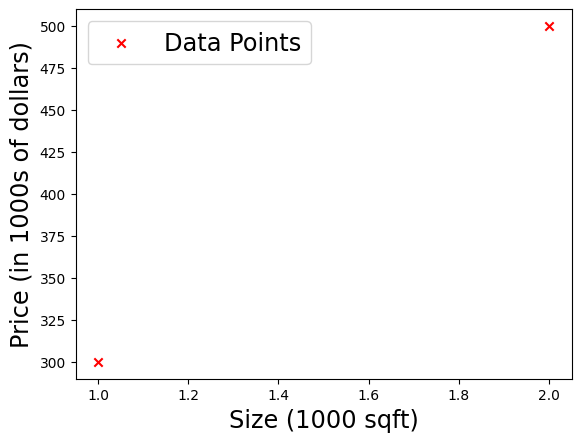

In [10]:
X_train = np.array([[1.0], [2.0]], dtype=np.float32)
Y_train = np.array([[300.0], [500.0]], dtype=np.float32) 

fig, ax=plt.subplots(1,1)
ax.scatter(X_train, Y_train, marker='x',c='r', label="Data Points")
ax.legend(fontsize="xx-large")
ax.set_ylabel('Price (in 1000s of dollars)', fontsize='xx-large')
ax.set_xlabel('Size (1000 sqft)', fontsize='xx-large')
plt.show()

# Regression/Linear Model
The function implemented by a neuron with no activation is the same as in Course 1, linear regression:
                         𝑓𝐰,𝑏(𝑥(𝑖))=𝐰⋅𝑥(𝑖)+𝑏(1)

In [11]:
linear_layer = tf.keras.layers.Dense(units=1, activation="linear")

In [12]:
linear_layer.get_weights()

[]

There are no weights as the weights are not yet instantiated. Let's try the model on one example in X_train. This will trigger the instantiation of the weights. Note, the input to the layer must be 2-D, so we'll reshape it.

In [13]:
a1=linear_layer(X_train[0].reshape(1,1))
print(a1)

tf.Tensor([[-1.5787218]], shape=(1, 1), dtype=float32)


The result is a tensor (another name for an array) with a shape of (1,1) or one entry.
Now let's look at the weights and bias. These weights are randomly initialized to small numbers and the bias defaults to being initialized to zero.

In [14]:
w,b=linear_layer.get_weights()
print(f"w={w}, b={b}")

w=[[-1.5787218]], b=[0.]


A linear regression model (1) with a single input feature will have a single weight and bias. This matches the dimensions of our linear_layer above.

The weights are initialized to random values so let's set them to some known values.

In [16]:
set_w=np.array([[200]])
set_b=np.array([100])

linear_layer.set_weights([set_w, set_b])
print(linear_layer.get_weights())

[array([[200.]], dtype=float32), array([100.], dtype=float32)]


Let's compare equation (1) to the layer output.

In [17]:
a1=linear_layer(X_train[0].reshape(1,1))
print(a1)

tf.Tensor([[300.]], shape=(1, 1), dtype=float32)


In [18]:
alin=np.dot(set_w, X_train[0].reshape(1,1)) +set_b
print(alin)

[[300.]]


They produce the same values! Now, we can use our linear layer to make predictions on our training data.

In [20]:
prediction_tf=linear_layer(X_train)
prediction_np= np.dot(X_train,set_w)+set_b

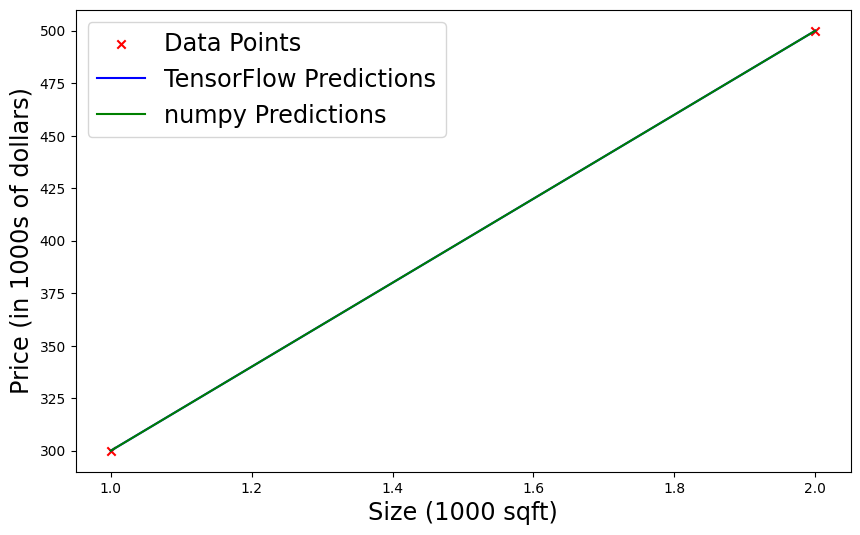

In [23]:
# Plotting the data points
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
ax.scatter(X_train, Y_train, marker='x', c='r', label="Data Points")
ax.plot(X_train, prediction_tf, label="TensorFlow Predictions", color='blue')
ax.plot(X_train, prediction_np, label="numpy Predictions", color='green')
ax.legend(fontsize="xx-large")
ax.set_ylabel('Price (in 1000s of dollars)', fontsize='xx-large')
ax.set_xlabel('Size (1000 sqft)', fontsize='xx-large')
plt.show()

# Neuron with Sigmoid activation
The function implemented by a neuron/unit with a sigmoid activation is the same as in Course 1, logistic regression:
𝑓𝐰,𝑏(𝑥(𝑖))=𝑔(𝐰𝑥(𝑖)+𝑏)(2)
where
𝑔(𝑥)=𝑠𝑖𝑔𝑚𝑜𝑖𝑑(𝑥)
 
Let's set  𝑤
  and  𝑏
  to some known values and check the model.

In [29]:
X_train = np.array([0., 1, 2, 3, 4, 5], dtype=np.float32).reshape(-1,1)  # 2-D Matrix
Y_train = np.array([0,  0, 0, 1, 1, 1], dtype=np.float32).reshape(-1,1)  # 2-D Matrix

Flatten Y_train

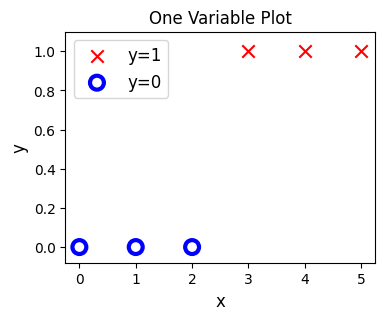

In [32]:
pos = Y_train == 1
neg = Y_train == 0

fig, ax = plt.subplots(1, 1, figsize=(4, 3))
ax.scatter(X_train[pos], Y_train[pos], marker='x', s=80, c='red', label="y=1")
ax.scatter(X_train[neg], Y_train[neg], marker='o', s=100, label="y=0", facecolors='none', edgecolors='blue', lw=3)

ax.set_ylim(-0.08, 1.1)
ax.set_ylabel('y', fontsize=12)
ax.set_xlabel('x', fontsize=12)
ax.set_title('One Variable Plot')
ax.legend(fontsize=12)
plt.show()

# Logistic Neuron
We can implement a 'logistic neuron' by adding a sigmoid activation. The function of the neuron is then described by (2) above.
This section will create a Tensorflow Model that contains our logistic layer to demonstrate an alternate method of creating models. Tensorflow is most often used to create multi-layer models. The Sequential model is a convenient means of constructing these models.

In [33]:
model = Sequential(
    [
        tf.keras.layers.Dense(1, input_dim=1,  activation = 'sigmoid', name='L1')
    ]
)

C:\Users\pc\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [34]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ L1 (Dense)                           │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

In [35]:
logistic_layer = model.get_layer('L1')
w,b= logistic_layer.get_weights()

print(w,b)
print(w.shape, b.shape)

[[1.6494416]] [0.]
(1, 1) (1,)


In [36]:
set_w = np.array([[2]])
set_b = np.array([-4.5])
# set_weights takes a list of numpy arrays
logistic_layer.set_weights([set_w, set_b])
print(logistic_layer.get_weights())

[array([[2.]], dtype=float32), array([-4.5], dtype=float32)]


In [38]:
def sigmoidnp(x):
    return 1/(1+np.exp(-x))

In [39]:
a1 = model.predict(X_train[0].reshape(1,1))
print(a1)
alog = sigmoidnp(np.dot(set_w,X_train[0].reshape(1,1)) + set_b)
print(alog)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
[[0.01098694]]
[[0.01098694]]


In [40]:
plt_logistic(X_train, Y_train, model, set_w, set_b, pos, neg)

NameError: name 'plt_logistic' is not defined